In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [68]:
df=pd.read_csv('Big_data_mart_train.csv')
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


There is zeros in Item_visibility column

There is NaN values in Outlet_size


# Exploratory Data Analysis

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [70]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Item_Weight,7060.0,12.857645,4.643456,4.555,8.773750,12.600000,16.850000,21.350000
Item_Visibility,8523.0,0.066132,0.051598,0.000,0.026989,0.053931,0.094585,0.328391
Item_MRP,8523.0,140.992782,62.275067,31.290,93.826500,143.012800,185.643700,266.888400
Outlet_Establishment_Year,8523.0,1997.831867,8.371760,1985.000,1987.000000,1999.000000,2004.000000,2009.000000
Item_Outlet_Sales,8523.0,2181.288914,1706.499616,33.290,834.247400,1794.331000,3101.296400,13086.964800


In [71]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

There is NaN values in Item_weight column

In [72]:
df['Item_Identifier'].value_counts()

FDG33    10
FDW13    10
FDW49     9
FDX31     9
FDQ40     9
         ..
FDY43     1
FDK57     1
FDE52     1
FDN52     1
DRF48     1
Name: Item_Identifier, Length: 1559, dtype: int64

In [73]:
df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [74]:
df['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [75]:
df['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [76]:
df['Outlet_Location_Type'].value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

In [77]:
df['Outlet_Type'].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

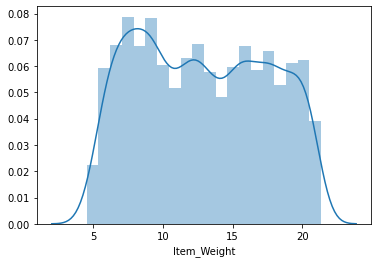

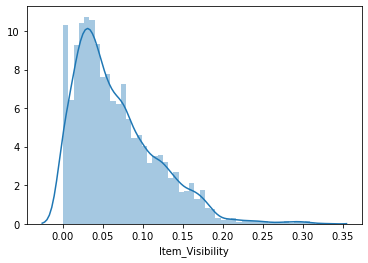

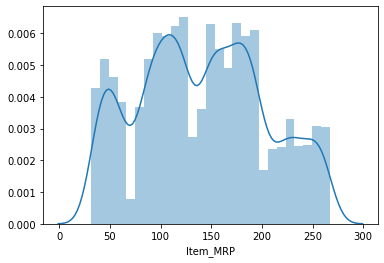

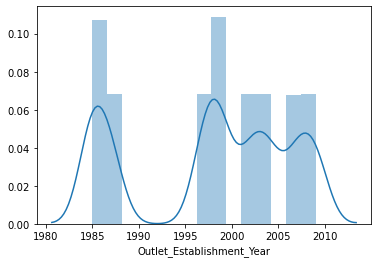

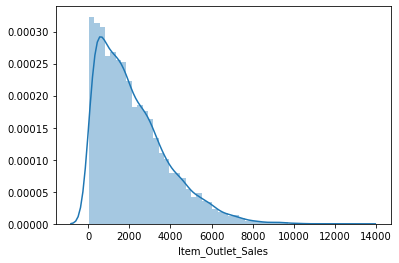

In [78]:
for i in df.describe().columns:
    sns.distplot(df[i])
    plt.show()

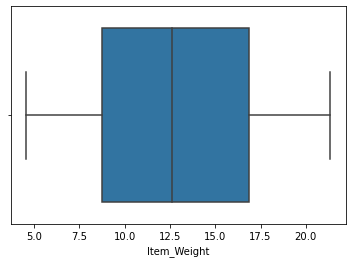

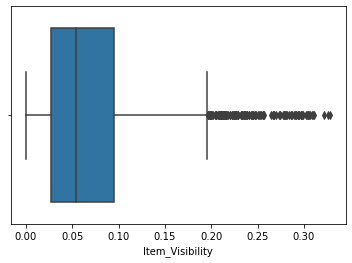

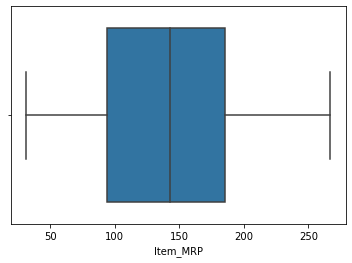

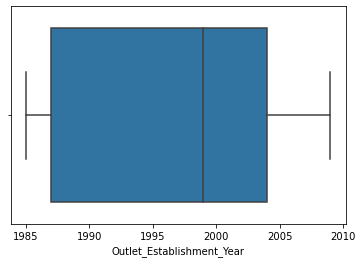

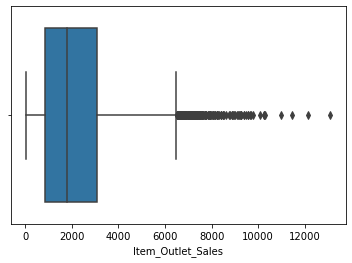

In [79]:
for i in df.describe().columns:
    sns.boxplot(df[i])
    plt.show()

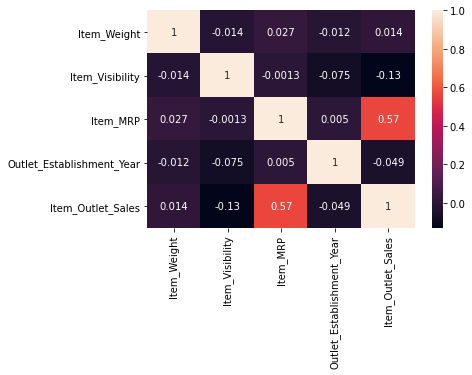

In [80]:
corr=df.corr()
sns.heatmap(corr,annot=True)

Item_Outlet_Sales positively correlated with Item_MRP

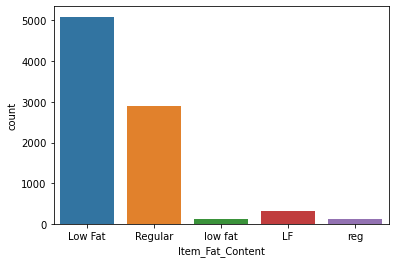

In [81]:
sns.countplot(df['Item_Fat_Content'])

[Text(0, 0, 'Dairy'),
 Text(0, 0, 'Soft Drinks'),
 Text(0, 0, 'Meat'),
 Text(0, 0, 'Fruits and Vegetables'),
 Text(0, 0, 'Household'),
 Text(0, 0, 'Baking Goods'),
 Text(0, 0, 'Snack Foods'),
 Text(0, 0, 'Frozen Foods'),
 Text(0, 0, 'Breakfast'),
 Text(0, 0, 'Health and Hygiene'),
 Text(0, 0, 'Hard Drinks'),
 Text(0, 0, 'Canned'),
 Text(0, 0, 'Breads'),
 Text(0, 0, 'Starchy Foods'),
 Text(0, 0, 'Others'),
 Text(0, 0, 'Seafood')]

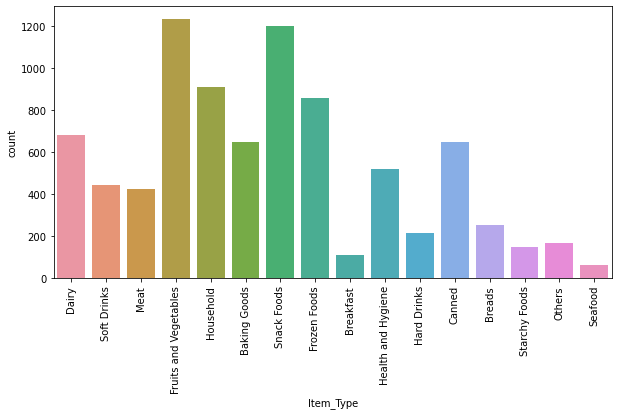

In [82]:
plt.figure(figsize=(10,5))
a=sns.countplot(df['Item_Type'])
a.set_xticklabels(labels=df['Item_Type'].unique(),rotation=90)

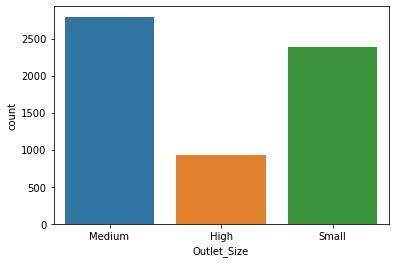

In [83]:
sns.countplot(df['Outlet_Size'])

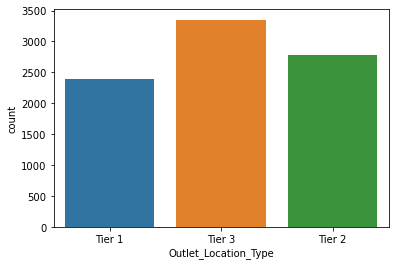

In [84]:
sns.countplot(df['Outlet_Location_Type'])

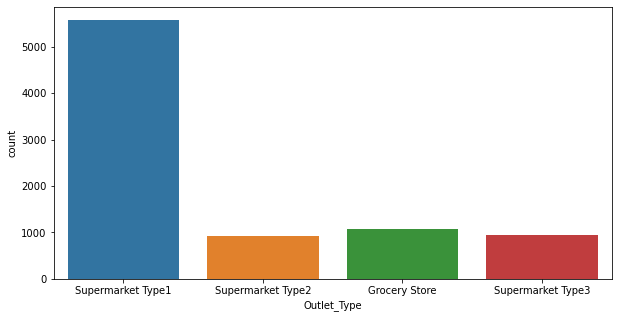

In [85]:
plt.figure(figsize=(10,5))
sns.countplot(df['Outlet_Type'])

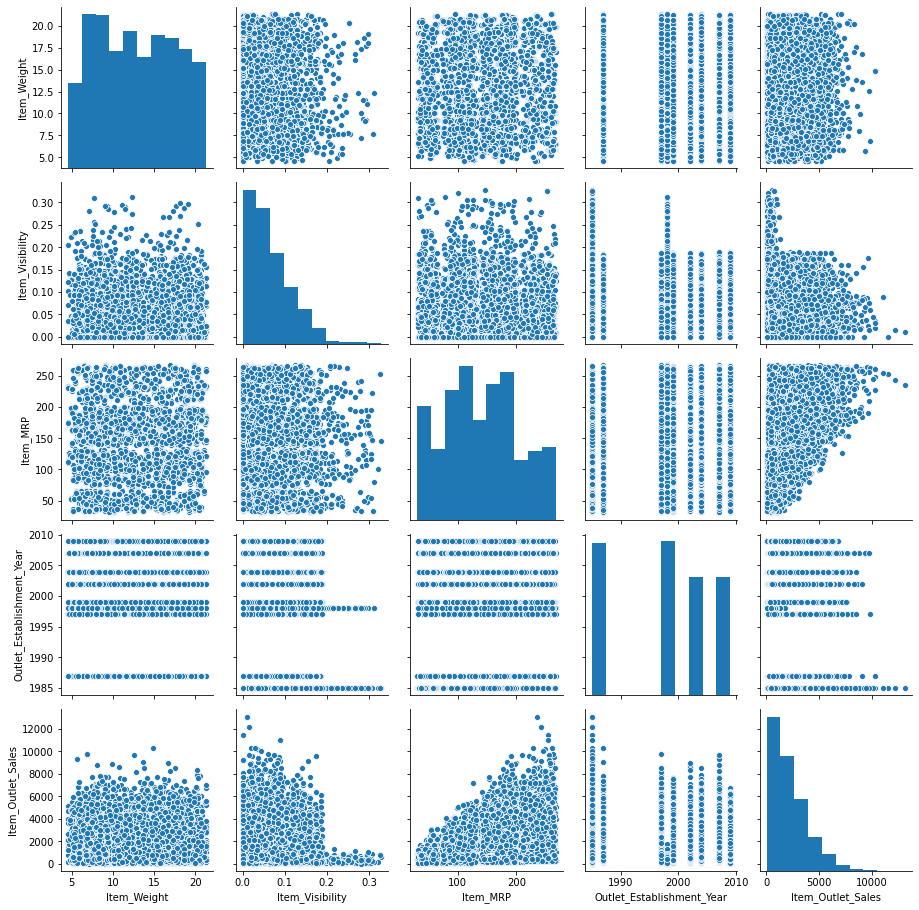

In [86]:
sns.pairplot(df)

# Data Cleaning

There is a NaN values in Item_Weight,Outlet_Size columns

There is a zeros in Item_visibility column

We have to fill the missing values

In [87]:
# Filling Item_weight NaN values with mean of that particular column
df['Item_Weight']=df['Item_Weight'].fillna(df['Item_Weight'].mean())

In [88]:
df['Item_Weight'].isnull().sum()

0

In [89]:
# filling Output_Size NaN values with mode of that particular column
mode=df['Outlet_Size'].mode().values[0]
df['Outlet_Size']=df['Outlet_Size'].fillna(value=mode)

In [90]:
df['Outlet_Size'].isnull().sum()

0

In [91]:
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [97]:
sum(df['Item_Visibility']==0)

526

In [98]:
# Replace zeros with mean
df.loc[:, 'Item_Visibility'].replace([0],[df['Item_Visibility'].mean()],inplace=True)

In [99]:
sum(df['Item_Visibility']==0)

0

In Item_Fat_Content column Low Fat, Regular  with diffrent names with LF and reg, so i want to chage same

In [92]:
df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [93]:
df['Item_Fat_Content']=df['Item_Fat_Content'].replace({'LF':"Low Fat",'reg':'Regular','low fat':'Low Fat'})

In [94]:
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

We can extract new insight from Item_Identifier FD--> Food,NC-->Non-Consumable,DR-->Drinks

In [100]:
df['New_Item_type']=df['Item_Identifier'].apply(lambda x: x[:2])
df['New_Item_type']

0       FD
1       DR
2       FD
3       FD
4       NC
        ..
8518    FD
8519    FD
8520    NC
8521    FD
8522    DR
Name: New_Item_type, Length: 8523, dtype: object

In [101]:
df['New_Item_type']=df['New_Item_type'].map({'FD':'Food',"NC":"Non-Consumable",'DR':'Drinks'})

In [102]:
df['New_Item_type'].value_counts()

Food              6125
Non-Consumable    1599
Drinks             799
Name: New_Item_type, dtype: int64

In [103]:
# create small year for establishment year
df['Outlet_Years']=2010-df['Outlet_Establishment_Year']

In [104]:
df['Outlet_Years']

0       11
1        1
2       11
3       12
4       23
        ..
8518    23
8519     8
8520     6
8521     1
8522    13
Name: Outlet_Years, Length: 8523, dtype: int64

In [105]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,New_Item_type,Outlet_Years
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,Food,11
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,Drinks,1
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,Food,11
3,FDX07,19.20,Regular,0.066132,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,Food,12
4,NCD19,8.93,Low Fat,0.066132,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,Non-Consumable,23


In [107]:
# i want to drop the old columns
df.drop(['Item_Identifier','Outlet_Establishment_Year'],axis=1,inplace=True)

In [108]:
df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,New_Item_type,Outlet_Years
0,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,Medium,Tier 1,Supermarket Type1,3735.1380,Food,11
1,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,Medium,Tier 3,Supermarket Type2,443.4228,Drinks,1
2,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,Medium,Tier 1,Supermarket Type1,2097.2700,Food,11
3,19.20,Regular,0.066132,Fruits and Vegetables,182.0950,OUT010,Medium,Tier 3,Grocery Store,732.3800,Food,12
4,8.93,Low Fat,0.066132,Household,53.8614,OUT013,High,Tier 3,Supermarket Type1,994.7052,Non-Consumable,23


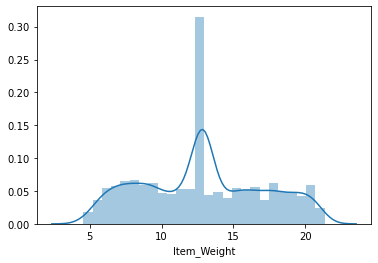

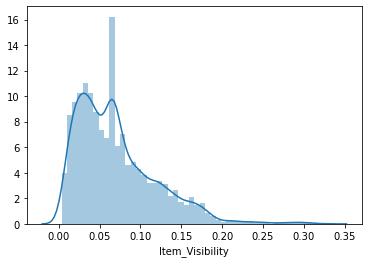

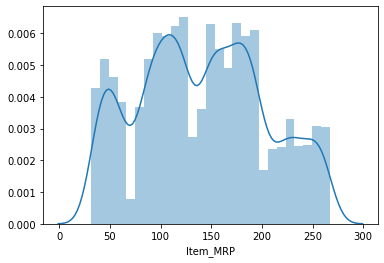

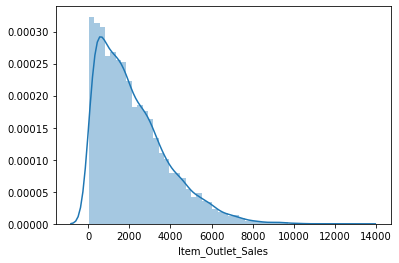

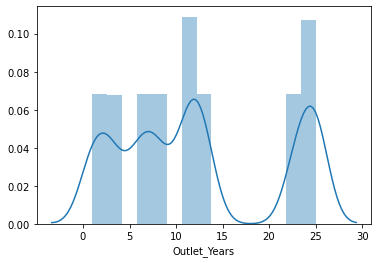

In [109]:
for i in df.describe().columns:
    sns.distplot(df[i])
    plt.show()

Item_outlet_Sales are left skewed we have normalize this by using log transformaton

In [111]:
df['Item_Outlet_Sales']=np.log(1+df['Item_Outlet_Sales'])

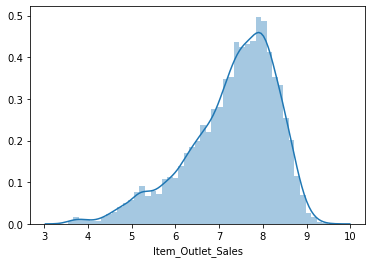

In [112]:
sns.distplot(df['Item_Outlet_Sales'])

We can see the curve is similar to normal distribution curve

# Data Preprocessing

In [114]:
from sklearn.preprocessing import LabelEncoder

In [117]:
le=LabelEncoder()
df['Outlet_Identifier']=le.fit_transform(df['Outlet_Identifier'])

In [118]:
df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,New_Item_type,Outlet_Years
0,9.30,Low Fat,0.016047,Dairy,249.8092,9,Medium,Tier 1,Supermarket Type1,8.225808,Food,11
1,5.92,Regular,0.019278,Soft Drinks,48.2692,3,Medium,Tier 3,Supermarket Type2,6.096776,Drinks,1
2,17.50,Low Fat,0.016760,Meat,141.6180,9,Medium,Tier 1,Supermarket Type1,7.648868,Food,11
3,19.20,Regular,0.066132,Fruits and Vegetables,182.0950,0,Medium,Tier 3,Grocery Store,6.597664,Food,12
4,8.93,Low Fat,0.066132,Household,53.8614,1,High,Tier 3,Supermarket Type1,6.903451,Non-Consumable,23


In [119]:
column_name=['Item_Fat_Content','Item_Type','Outlet_Size','Outlet_Location_Type','Outlet_Type','New_Item_type']
for i in column_name:
    df[i]=le.fit_transform(df[i])

In [121]:
df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,New_Item_type,Outlet_Years
0,9.30,0,0.016047,4,249.8092,9,1,0,1,8.225808,1,11
1,5.92,1,0.019278,14,48.2692,3,1,2,2,6.096776,0,1
2,17.50,0,0.016760,10,141.6180,9,1,0,1,7.648868,1,11
3,19.20,1,0.066132,6,182.0950,0,1,2,0,6.597664,1,12
4,8.93,0,0.066132,9,53.8614,1,0,2,1,6.903451,2,23


# Machine Learning

In [128]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.linear_model import Lasso,Ridge
from sklearn.model_selection import cross_val_score

In [130]:
x=df.drop('Item_Outlet_Sales',axis=1)
x

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,New_Item_type,Outlet_Years
0,9.300,0,0.016047,4,249.8092,9,1,0,1,1,11
1,5.920,1,0.019278,14,48.2692,3,1,2,2,0,1
2,17.500,0,0.016760,10,141.6180,9,1,0,1,1,11
3,19.200,1,0.066132,6,182.0950,0,1,2,0,1,12
4,8.930,0,0.066132,9,53.8614,1,0,2,1,2,23
...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,0,0.056783,13,214.5218,1,0,2,1,1,23
8519,8.380,1,0.046982,0,108.1570,7,1,1,1,1,8
8520,10.600,0,0.035186,8,85.1224,6,2,1,1,2,6
8521,7.210,1,0.145221,13,103.1332,3,1,2,2,1,1


In [132]:
y=df['Item_Outlet_Sales']
y

0       8.225808
1       6.096776
2       7.648868
3       6.597664
4       6.903451
          ...   
8518    7.929984
8519    6.310436
8520    7.085159
8521    7.521100
8522    6.642056
Name: Item_Outlet_Sales, Length: 8523, dtype: float64

In [161]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [162]:
x_train.shape

(6392, 11)

In [163]:
x_test.shape

(2131, 11)

In [164]:
y_train.shape

(6392,)

In [165]:
y_test.shape

(2131,)

In [166]:
lm=LinearRegression()
lm.fit(x_train,y_train)

LinearRegression()

In [167]:
lm.coef_

array([-2.78337997e-03,  3.18703968e-02, -1.46220613e+00,  2.37483281e-04,
        8.29557940e-03,  7.03068918e-02, -4.42303313e-01, -2.16354403e-01,
        6.21999160e-01,  1.15509775e-02, -1.77453759e-02])

In [168]:
lm.intercept_

6.140933373534746

In [170]:
lm.score(x_train,y_train)

0.593007796115236

In [171]:
# predict the value
pred=lm.predict(x_test)
print("predicted Output_Sales : ",pred)
print('actual Output_Sales : ',y_test)

predicted Output_Sales :  [6.58578684 6.46329805 7.05034946 ... 8.00343392 7.71399682 7.36024348]
actual Output_Sales :  7503    7.463974
2957    5.880166
7031    5.936239
1084    8.662069
856     7.765540
          ...   
4753    8.241368
4836    7.788154
8064    8.577489
4418    7.836649
1784    8.328358
Name: Item_Outlet_Sales, Length: 2131, dtype: float64


In [172]:
print("error : ")

print("Mean absolute error : ",mean_absolute_error(y_test,pred))
print("Mean squared error : ",mean_squared_error(y_test,pred))

print("Root mean squared error : ",np.sqrt(mean_squared_error(y_test,pred)))

error : 
Mean absolute error :  0.5148152110320003
Mean squared error :  0.4255588428393624
Root mean squared error :  0.6523487126065034


In [173]:
# r2 score
print(r2_score(y_test,pred))

0.5957885966523422


# Cross Validation

In [174]:

lm_scores= cross_val_score(lm,x,y,cv=10)
print(lm_scores)
print(lm_scores.mean(),lm_scores.std())

[0.61005772 0.60464769 0.59696775 0.59926134 0.5451627  0.58577317
 0.60719361 0.54878511 0.63109015 0.58983415]
0.5918773389874048 0.02535134986795751


# Regularization

In [175]:
ls=Lasso(alpha=0.0001)
#ls= Lasso(alpha=1) default
ls.fit(x_train,y_train)
ls.score(x_train,y_train)

0.5930031830342177

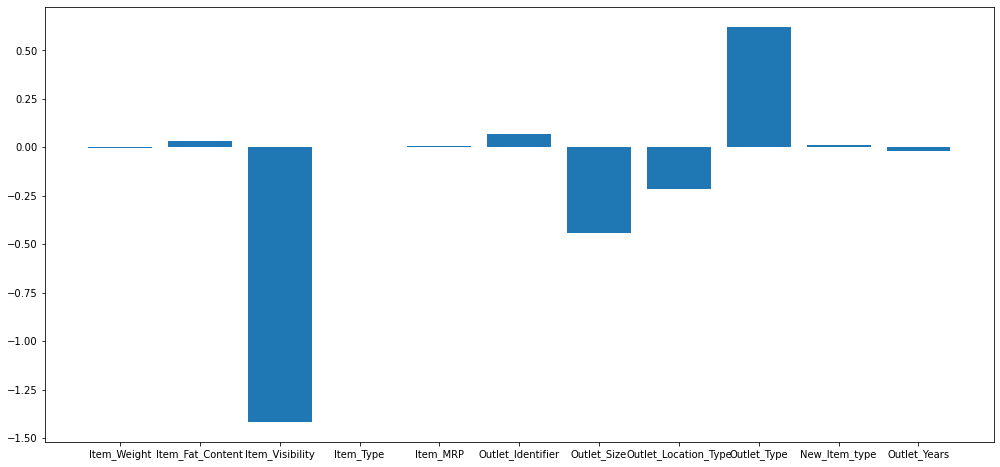

In [176]:
plt.figure(figsize=(17,8))
plt.bar(x.columns,ls.coef_)
plt.show()

In [177]:

rd=Ridge(alpha=0.001)
rd.fit(x_train,y_train)
rd.score(x_train,y_train)

0.5930077960919453

<BarContainer object of 11 artists>

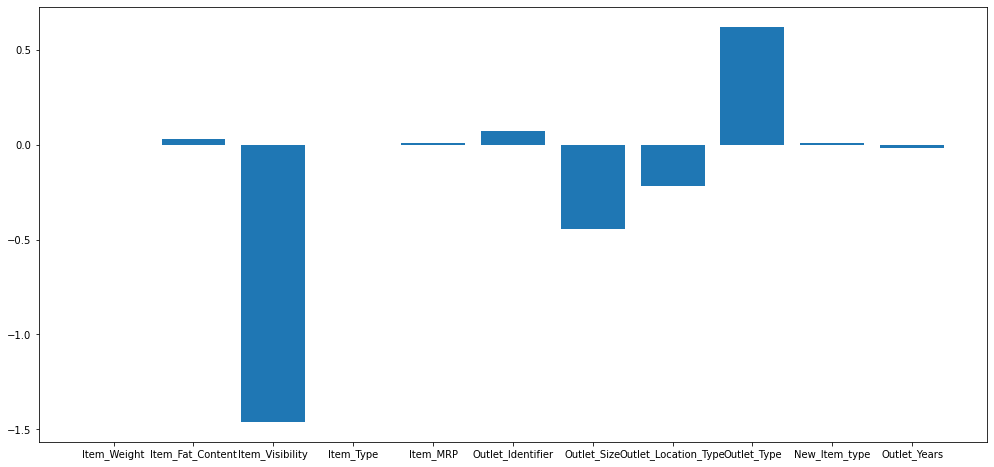

In [178]:
plt.figure(figsize=(17,8))
plt.bar(x.columns,rd.coef_)

# Ensemble

In [179]:
from sklearn.ensemble import RandomForestRegressor
rd=RandomForestRegressor()
rd.fit(x_train,y_train)
rd_pred=rd.predict(x_test)
print("Mean absolute error : ",mean_absolute_error(y_test,rd_pred))
print("Mean squared error : ",mean_squared_error(y_test,rd_pred))

print("Root mean squared error : ",np.sqrt(mean_squared_error(y_test,rd_pred)))
print('r2 score :',r2_score(y_test,rd_pred))

Mean absolute error :  0.42965755459054905
Mean squared error :  0.30559745119104614
Root mean squared error :  0.5528086931218124
r2 score : 0.7097323280107988


In [180]:
from sklearn.ensemble import AdaBoostRegressor

ad=AdaBoostRegressor()
ad.fit(x_train,y_train)
ad_predict=ad.predict(x_test)
print("Mean absolute error : ",mean_absolute_error(y_test,ad_predict))
print("Mean squared error : ",mean_squared_error(y_test,ad_predict))
print("Root mean squared error : ",np.sqrt(mean_squared_error(y_test,ad_predict)))
print('r2 score :',r2_score(y_test,ad_predict))

Mean absolute error :  0.4570435490452122
Mean squared error :  0.3202290493696385
Root mean squared error :  0.5658878416874129
r2 score : 0.6958346992045743


# Saving Best model

In [183]:
import joblib

RandomForestRegressor giving Highest r2 score

In [184]:
joblib.dump(rd,'rdfile.ob')

['rdfile.ob']